# Выбор локации для скважины

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.* Нужно решить, где бурить новую скважину.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

***Описание целей и задач проекта***

Компании требуется определить, где бурить новую скважину. Есть пробы нефти в 3 регионах: в каждом 10 000 месторождений, где измеряли качество нефти и объем ее запасов.

Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. С мощью техники *Bootstrap.* следует проанализироваьб возможную прибыль и риски.

***Описание данных***


Данные геологоразведки трёх регионов находятся в файлах:
- /datasets/geo_data_0.csv. Скачать датасет
- /datasets/geo_data_1.csv. Скачать датасет
- /datasets/geo_data_2.csv. Скачать датасет

Признаки:

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

***План работы***

1) Провести предварительынй анализ данных и предобработку, если потребутеся.

2) Извлечь признаки и целевой признак.

3) Разбить данные на обучающую и валидационную выборки.

4) Провести масштабирование признаков.

5) Обучить модели линейной регрессии и проверить их работу, подсчитать метрику RMSE.

6) Подсчитать точку безубыточности.

7) Техникой Bootstrap посчитать среднюю прибыль по каждому региону и определить 95% доверительный интервал для возможной прибыли и посчитать вероятность убытка.

8) На основе полученных данных определить регион, где добыча нефти принесет наибольшую прибыль.


## Загрузка и подготовка данных

In [1]:
#все импорты библиотек для текущего проекта
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats as st

from numpy.random import RandomState

import matplotlib.pyplot as plt
import seaborn as sns


***Константы проекта***

In [2]:
#расходы на разработку, переведом сразу в тыс. руб.(  было 10_000_000_000)
BUDGET = 10_000_000
#цена за 1 единицу продукта = 1 тыс. бареллей
PRICE = 450
#число скважин для разработк
COUNT= 200 

Загрузим данные геологоразведки по 3 регионам 

In [3]:
data0= pd.read_csv('/datasets/geo_data_0.csv')
data0.info()
print(data0.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


In [4]:
data1= pd.read_csv('/datasets/geo_data_1.csv')
data1.info()
print(data1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305


In [5]:
data2= pd.read_csv('/datasets/geo_data_2.csv')
data2.info()
print(data2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


Проверим данные на наличие полных дубликтов и посмотрим 

In [6]:
print('Дубликаты в данных по регионам:')
print('1 регион', data0['id'].duplicated().sum())
print('2 регион', data1['id'].duplicated().sum())
print('3 регион', data2['id'].duplicated().sum())

Дубликаты в данных по регионам:
1 регион 10
2 регион 4
3 регион 4


In [7]:
 #удаление дубликатов в данных
data0 = data0.drop_duplicates(subset=['id'], keep='first')
data1 = data1.drop_duplicates(subset=['id'], keep='first')
data2 = data2.drop_duplicates(subset=['id'], keep='first')
print(data0.shape)
print(data1.shape)
print(data2.shape)

(99990, 5)
(99996, 5)
(99996, 5)


Посмотрим распределение запасов в скажинах по каждому региону, построив гистограмму для `product`.
Посчитаем мультиколлинеарность данных признаков по регионам.

1 регион:
корреляция признака f0 c запасами  скважине: 0.14350354470629628
корреляция признака f1 c запасами  скважине: -0.19235060940995077
корреляция признака f2 c запасами  скважине: 0.483630982761089


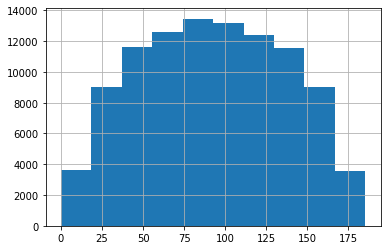

In [8]:
#1 регион
#гистограмма по распределению запасов в скажинах
data0['product'].hist(bins=10)
#корреляция признаков с количеством запасов
print('1 регион:')
print('корреляция признака f0 c запасами  скважине:', data0['f0'].corr(data0['product']))
print('корреляция признака f1 c запасами  скважине:', data0['f1'].corr(data0['product']))
print('корреляция признака f2 c запасами  скважине:', data0['f2'].corr(data0['product']))

2 регион:
корреляция признака f0 c запасами  скважине: -0.030522920755861983
корреляция признака f1 c запасами  скважине: -0.010153692790654676
корреляция признака f2 c запасами  скважине: 0.9993969736591198


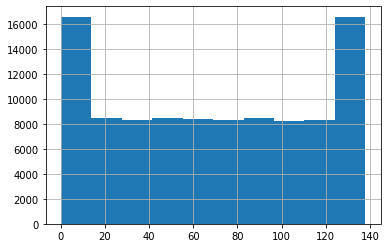

In [9]:
#2 регион
#гистограмма по распределению запасов в скажинах
data1['product'].hist(bins=10)
#корреляция признаков с количеством запасов
print('2 регион:')
print('корреляция признака f0 c запасами  скважине:', data1['f0'].corr(data1['product']))
print('корреляция признака f1 c запасами  скважине:', data1['f1'].corr(data1['product']))
print('корреляция признака f2 c запасами  скважине:', data1['f2'].corr(data1['product']))

3 регион:
корреляция признака f0 c запасами  скважине: -0.001977658242440491
корреляция признака f1 c запасами  скважине: -0.0010545826382116158
корреляция признака f2 c запасами  скважине: 0.44586699434895694


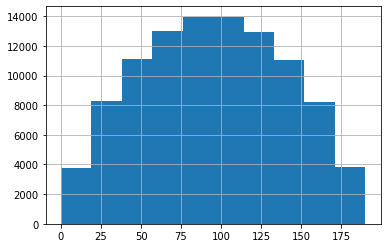

In [10]:
#3 регион
#гистограмма по распределению запасов в скажинах
data2['product'].hist(bins=10)
#корреляция признаков с количеством запасов
print('3 регион:')
print('корреляция признака f0 c запасами  скважине:', data2['f0'].corr(data2['product']))
print('корреляция признака f1 c запасами  скважине:', data2['f1'].corr(data2['product']))
print('корреляция признака f2 c запасами  скважине:', data2['f2'].corr(data2['product']))

***Тепловые карты корреляции между признаками и запасами в скважинах***

1 регион


<AxesSubplot:>

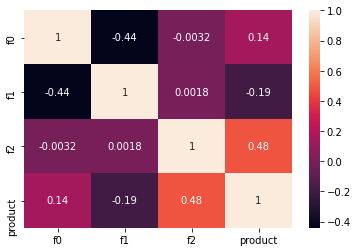

In [11]:
#тепловая карта корреляции
print ('1 регион')
upp_mat = np.triu(data0.corr())
sns.heatmap(data0.corr(), annot = True)
#sns.heatmap(data0.corr()[['product']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

2 регион


<AxesSubplot:>

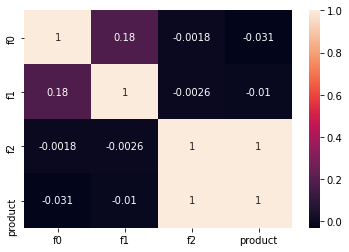

In [12]:
#тепловая карта корреляции
print ('2 регион')
upp_mat = np.triu(data1.corr())
sns.heatmap(data1.corr(), annot = True)
#sns.heatmap(data1.corr()[['product']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

3 регион


<AxesSubplot:>

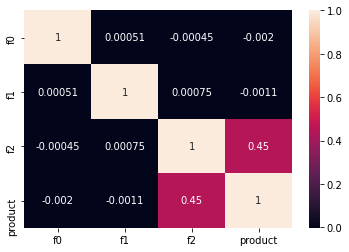

In [13]:
#тепловая карта корреляции
print ('3 регион')
upp_mat = np.triu(data2.corr())
sns.heatmap(data2.corr(), annot = True)
#sns.heatmap(data2.corr()[['product']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

***Вывод  по предварительному анализу данных:***

- пропусков в данных не было, но были обнаружены дубликаты, их удалили.
- значения признаком количественные, качественных нет; 
- потребуется  потребуется масштабирование признаков техникой OHE.

По распределению целевой переменной на графиках видно, что  по регионам видно распределение близко к нормальному

По корреляции признаков:

1)1 регион: наблюдается корреляция (0.48) между признаком F2 и запасами и сильная прямая обратная корреляция между F0 и  F1. 

2)2 регион: наблюдается прямая и очень сильная зависимость между признако F2 и запасами.

3)3 регион: также корреляция между признаком F2и запасами.

В условии сказано, что все признаки значимые, поэтому ничего удалять не будем.

## Обучение и проверка модели

In [14]:
#извлекаем  признаки и удалим целевой признак product и лишний id
features0 = data0.drop(columns=['product', 'id'], axis=1)  
features1 = data1.drop(columns=['product', 'id'], axis=1)
features2 = data2.drop(columns=['product', 'id'], axis=1)

# извлекаем целевой признак
target0 = data0['product'] 
target1 = data1['product'] 
target2 = data2['product'] 

print('Проверка признаков')
print('1 регион:', features0.head())
print('2 регион:', features1.head())
print('3 регион:', features2.head())

Проверка признаков
1 регион:          f0        f1        f2
0  0.705745 -0.497823  1.221170
1  1.334711 -0.340164  4.365080
2  1.022732  0.151990  1.419926
3 -0.032172  0.139033  2.978566
4  1.988431  0.155413  4.751769
2 регион:           f0         f1        f2
0 -15.001348  -8.276000 -0.005876
1  14.272088  -3.475083  0.999183
2   6.263187  -5.948386  5.001160
3 -13.081196 -11.506057  4.999415
4  12.702195  -8.147433  5.004363
3 регион:          f0        f1        f2
0 -1.146987  0.963328 -0.828965
1  0.262778  0.269839 -2.530187
2  0.194587  0.289035 -5.586433
3  2.236060 -0.553760  0.930038
4 -0.515993  1.716266  5.899011


In [15]:
# отделите 25% данных для валидационной выборки
features_train0, features_valid0, target_train0, target_valid0 = train_test_split(
    features0, target0, test_size=0.25, random_state=12345) 

features_train1, features_valid1, target_train1, target_valid1 = train_test_split(
    features1, target1, test_size=0.25, random_state=12345) 

features_train2, features_valid2, target_train2, target_valid2 = train_test_split(
    features2, target2, test_size=0.25, random_state=12345) 

print('Величина выборок для 1 региона')
print('Размер обучающей выборки', features_train0.shape)
print('Размер валидационной выборки', features_valid0.shape)
print(' ')
print('Величина выборок для 2 региона')
print('Размер обучающей выборки', features_train1.shape)
print('Размер валидационной выборки', features_valid1.shape)
print(' ')
print('Величина выборок для 3 региона')
print('Размер обучающей выборки', features_train2.shape)
print('Размер валидационной выборки', features_valid2.shape)

Величина выборок для 1 региона
Размер обучающей выборки (74992, 3)
Размер валидационной выборки (24998, 3)
 
Величина выборок для 2 региона
Размер обучающей выборки (74997, 3)
Размер валидационной выборки (24999, 3)
 
Величина выборок для 3 региона
Размер обучающей выборки (74997, 3)
Размер валидационной выборки (24999, 3)


***Проведем стандартизацию данных***

In [16]:
#список всех численных признаков.
numeric = ['f0', 'f1', 'f2']

#1 регион
#создадим объект стандартизации и обучим его
scaler_0 = StandardScaler()    
scaler_0.fit(features_train0[numeric])
#сохраним преобразованные обучающую,валидационную и тестовую  выборки в переменные
features_train0[numeric] = scaler_0.transform(features_train0[numeric])
features_valid0[numeric] = scaler_0.transform(features_valid0[numeric]) 

#2 регион
#создадим объект стандартизации и обучим его
scaler_1 = StandardScaler()    
scaler_1.fit(features_train1[numeric])
#сохраним преобразованные обучающую,валидационную и тестовую  выборки в переменные
features_train1[numeric] = scaler_1.transform(features_train1[numeric])
features_valid1[numeric] = scaler_1.transform(features_valid1[numeric]) 

#3 регион
#создадим объект стандартизации и обучим его
scaler_2 = StandardScaler()    
scaler_2.fit(features_train0[numeric])
#сохраним преобразованные обучающую,валидационную и тестовую  выборки в переменные
features_train2[numeric] = scaler_2.transform(features_train2[numeric])
features_valid2[numeric] = scaler_2.transform(features_valid2[numeric]) 

pd.options.mode.chained_assignment = None

print('Проверка выполения стандартизации')
print(' ')
print('1 регион-обучающая выборка')
print(features_train0.head())
print('1 регион-валидационная')
print(features_valid0.head())
print(' ')
print('2 регион-обучающая выборка')
print(features_train1.head())
print('2 регион-валидационная')
print(features_valid1.head())
print(' ')
print('3 регион-обучающая выборка')
print(features_train2.head())
print('3 регион-валидационная',features_valid2.head())

Проверка выполения стандартизации
 
1 регион-обучающая выборка
             f0        f1        f2
75167  0.776287 -1.255120 -0.067528
43242 -1.580378 -0.176704 -1.281795
91995 -0.646319  0.136966 -0.505430
5094  -0.509367  1.253916 -0.856553
78252 -0.737723  1.534093 -0.372715
1 регион-валидационная
             f0        f1        f2
49468 -0.488322  1.526077  1.100100
55496  1.706214  0.046304 -1.126645
11690  1.743170 -0.769414 -0.127529
13770  1.589291  0.167026 -0.122386
72395  0.691862 -1.516048 -0.835819
 
2 регион-обучающая выборка
             f0        f1        f2
7866   1.969969  1.837435  0.297397
83622 -0.814630  1.729298  0.303413
45142 -1.137949  0.734327  1.476398
35823  0.656865  1.949531 -1.461694
17773  1.769386 -0.319261  0.885476
2 регион-валидационная
             f0        f1        f2
71748  1.598998  0.011817 -0.287812
80490 -1.113187 -0.407630  1.473505
2655  -0.853139 -0.002067 -0.872473
71171 -0.462303  0.173963  0.302767
91141  0.551117  0.060956 -1.45325

/tmp/ipykernel_93/990402050.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train0[numeric] = scaler_0.transform(features_train0[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

Сбросим индексы, чтобы в дальнейшем было проще сопотавлять данные по target  и predicton

In [17]:
features_train0 = features_train0.reset_index(drop=True)
features_valid0 = features_valid0.reset_index(drop=True)
target_train0 = target_train0.reset_index(drop=True)
target_valid0 = target_valid0.reset_index(drop=True)

features_train1 = features_train1.reset_index(drop=True)
features_valid1 = features_valid1.reset_index(drop=True)
target_train1 = target_train1.reset_index(drop=True)
target_valid1 = target_valid1.reset_index(drop=True)

features_train2 = features_train2.reset_index(drop=True)
features_valid2 = features_valid2.reset_index(drop=True)
target_train2 = target_train2.reset_index(drop=True)
target_valid2 = target_valid2.reset_index(drop=True)


Обучим модель линейной регрессии и сделаем предсказания на валидационной выборке.
Сохраним предсказания на валидационной выборке.


In [19]:
#функция для предсказывания модели LinearRegression
def predictions (features_train, target_train, features_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    return model.predict(features_valid)

1) Посчитаем средний запас на 1 скважине по каждому из 3 регионов.

2) Рассчитаем RMSE модели  - среднее возможное отклонение в расчетах (квадратный корень из средней квадратичной ошибки).

In [20]:
#значение метрики RMSE на валидационной выборке

predictions_valid0 = predictions (features_train0, target_train0, features_valid0)
predictions_valid1 = predictions (features_train1, target_train1, features_valid1)
predictions_valid2 = predictions (features_train2, target_train2, features_valid2)

result0 = mean_squared_error(target_valid0, predictions_valid0)**0.5  
result1 = mean_squared_error(target_valid1, predictions_valid1)**0.5  
result2 = mean_squared_error(target_valid2, predictions_valid2)**0.5  
print("RMSE модели линейной регрессии на валидационной выборке для 1 региона:", result0)
print("RMSE модели линейной регрессии на валидационной выборке для 2 региона:", result1)
print("RMSE модели линейной регрессии на валидационной выборке для 3 региона:", result2)
print(' ')
print('Средний запас предсказаного сырья в каждой скважине по регионам ( в тыс. баррелей):')
print('1 регион:', predictions_valid0.mean())
print('2 регион:', predictions_valid1.mean())
print('3 регион:', predictions_valid2.mean())

RMSE модели линейной регрессии на валидационной выборке для 1 региона: 37.853527328872964
RMSE модели линейной регрессии на валидационной выборке для 2 региона: 0.8920592647717033
RMSE модели линейной регрессии на валидационной выборке для 3 региона: 40.07585073246016
 
Средний запас предсказаного сырья в каждой скважине по регионам ( в тыс. баррелей):
1 регион: 92.78915638280621
2 регион: 69.1783195703043
3 регион: 94.86572480562035


 ***Вывод:***
        
На обучающих данных мы построили  на модель линнейной регрессии для прогнозировани запасов нефти по регионам, 
исходя из заданны параметром  f0, f1, f2.
И сдалали проноз на основе валидационной выборке. По прогнозу наибольший средний запас данных  находится:

- 1 место - 3 регион  = 94.96504596800489, 
- 2 место - 1 регион = 92.59256778438035,
- 3 место - 2 регион 68.728546895446.

Но если смотреть метрику RMSE, которая показываем среднюю ошибку в прогнозирование, то рейтинг регионов по запасам 
будет другой:

- 1 место - 2 регион
- 2 место - 1 регион
- 3 место - 3 регион

Все потому, что наибольшее отклонение в прогнозах у нас можеть быть по 3 региону = 40.02970873393434, а наименьшее 
по 2 = 0.8930992867756169.


## Подготовка к расчёту прибыли

Какие данные есть:

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбрать регион с наибольшей средней прибылью.

На разработку 200 скважин расходуется 10 млрд. рублей, а доход от 1 единицы продукта составлемя 450 тыс. рублей. 

Найдем точку безубыточности 1 скважины, при которой мы покроем расходы на разработку, но не получим прибыль.

В дальнейшме этот показатель будем сравнивать со среднем прибылью по скважине, чтобы определить наиболее прибыльный регион для будущей разработки.

- Все ключевые значения для расчётов сохраните в отдельных переменных.
- Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.

In [21]:
#считаем точку безубыточности
tb = BUDGET / PRICE 
tb_well = BUDGET/ PRICE /200 

print("Точка безубыточности для региона равна: {:.2f} тыс.баррелей".format(tb))
print("Точка безубыточности для 1 скважины равна: {:.2f} тыс. баррелей".format(tb_well))
print('')
print("Точка безубыточности для региона равна: {:.2f} тыс. руб.".format(tb*PRICE))
print("Точка безубыточности для 1 скважины равна: {:.2f} тыс. руб.".format(tb_well*PRICE))

Точка безубыточности для региона равна: 22222.22 тыс.баррелей
Точка безубыточности для 1 скважины равна: 111.11 тыс. баррелей

Точка безубыточности для региона равна: 10000000.00 тыс. руб.
Точка безубыточности для 1 скважины равна: 50000.00 тыс. руб.


In [22]:
#среднее количество продуета для каждого региона в рублях:

print('Средний запас предсказаного сырья в каждой скважине по регионам ( в тыс. баррелях):')
print('1 регион:', predictions_valid0.mean()*COUNT,'тыс. баррелей')
print('2 регион:', predictions_valid1.mean()*COUNT, 'тыс. баррелей')
print('3 регион:', predictions_valid2.mean()*COUNT, 'тыс. баррелей')
print('')
print('Средний запас предсказаного сырья в каждой скважине по регионам ( в млн. рублей):')
print('1 регион:', predictions_valid0.mean()*COUNT*PRICE/1000,'млн. рублей')
print('2 регион:', predictions_valid1.mean()*COUNT*PRICE/1000, 'млн. рублей')
print('3 регион:', predictions_valid2.mean()*COUNT*PRICE/1000, 'млн. рублей')

Средний запас предсказаного сырья в каждой скважине по регионам ( в тыс. баррелях):
1 регион: 18557.831276561243 тыс. баррелей
2 регион: 13835.663914060859 тыс. баррелей
3 регион: 18973.144961124068 тыс. баррелей

Средний запас предсказаного сырья в каждой скважине по регионам ( в млн. рублей):
1 регион: 8351.02407445256 млн. рублей
2 регион: 6226.048761327386 млн. рублей
3 регион: 8537.91523250583 млн. рублей


## ***Вывод:***

Средний запас предсказаного сырья в каждой скважине по регионам:

- 1 регион: 92.59256778438035 тыс. баррелей
- 2 регион: 68.72854689544602 тыс. баррелей
- 3 регион: 94.96504596800489 тыс. баррелей


Средний запас сырья по регионам ( в тыс. баррелях):
- 1 регион: 18 557.831276561243 тыс. баррелей
- 2 регион: 13 835.663914060859 тыс. баррелей
- 3 регион: 18 973.144961124068 тыс. баррелей

Средний запас предсказаного сырья по регионам ( в тыс. рублей):
- 1 регион: 8 351.02 млн. рублей
- 2 регион: 6 226.05 млн. рублей
- 3 регион: 8 537.92 млн. рублей


Точка безубыточности для региона равна: 22 222.22 тыс.баррелей
Точка безубыточности для 1 скважины равна: 111.11 тыс. баррелей

Точка безубыточности для региона равна: 10 000. млн. рублей
Точка безубыточности для 1 скважины равна: 50.00 млн. рублей


Сравнивая величину точки безубыточности  для одной скважины со средними запасами нефти по 3 регионам, а также сравнивая общие данные по региону в баррелях и рублях, расчитанные выше,  можем сделать вывод,  что  средних запасов запасов нефти в каждом из трех регионов не достаточно, чтобы получить прибыль, так как их величина меньше точки безубыточности, при которой прибыль компании будет равна нулю.

In [29]:
target0.mean(), target1.mean(), target2.mean()

(92.49968421774354, 68.82391591804064, 94.99834211933378)

## Расчёт прибыли и рисков 

Расчитаем среднюю прибыль для каждого региона техникой Bootstrap, при этом в расчет будем брать 200 скважин с   максимальными значениями предсказаний.

In [24]:
#функция для расчета прибыли

def profit (target, predictions):
    predictions=pd.Series(predictions)
    predictions=predictions.sort_values(ascending = False).head(200)
    selected = target[predictions.index]
    revenue = selected.sum()*PRICE
    return(revenue-BUDGET)


profit0 = profit (target_valid0, predictions_valid0)
profit1 = profit (target_valid1, predictions_valid1)
profit2 = profit (target_valid2, predictions_valid2)

#прибыль по региону, расчитанная на основе модели линейной регресси
print('Прибыль по 1 региону: {:.2f}  млн. руб.'.format(profit0/1000))
print('Прибыль по 2 региону: {:.2f}  млн. руб.'.format(profit1/1000))
print('Прибыль по 3 региону: {:.2f}  млн. руб.'.format(profit2/1000))

Прибыль по 1 региону: 3365.19  млн. руб.
Прибыль по 2 региону: 2415.09  млн. руб.
Прибыль по 3 региону: 2501.28  млн. руб.


По прогнозным расчетам максимальную прибыль компания получит от разведывания скважин в 3 регионе.

***Посчитайте риски и прибыль для каждого региона, применяя технику Bootstrap***

 Применим  технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли

In [25]:
def bootstrap (target, predictions):
    state = np.random.RandomState(12345)
    values = []
    predictions=pd.Series(predictions)
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        predictions_subsample = predictions[target_subsample.index]
        values.append(profit(target_subsample, predictions_subsample))
    count = 0
    for i in values:
        if i < 0:
            count +=1        
    values = pd.Series(values)
    
    mean =  values.mean()
    
    lower = values.quantile(0.025)/1000
    upper = values.quantile(0.975)/1000

    print("Средняя прибыль: {:.2f} млн.руб".format(mean/1000))
    print(f'95% доверительный интервал по региону находится в пределах от {lower}  до {upper} млн. рублей')
    print ('Процент вероятности убытка в данном регионе составит {:.5%}'.format(count/1000))

***Распределение прибыли и рисков для 1 региона***

In [26]:
print(bootstrap (target_valid0, predictions_valid0))

Средняя прибыль: 585.65 млн.руб
95% доверительный интервал по региону находится в пределах от -5.878445790209243  до 1279.2400755693025 млн. рублей
Процент вероятности убытка в данном регионе составит 2.80000%
None


***Распределение прибыли и рисков для 2 региона***

In [27]:
print(bootstrap (target_valid1, predictions_valid1))

Средняя прибыль: 682.30 млн.руб
95% доверительный интервал по региону находится в пределах от 185.79958171697785  до 1247.6844632237473 млн. рублей
Процент вероятности убытка в данном регионе составит 0.30000%
None


***Распределение прибыли и рисков для 3 региона***

In [28]:
print(bootstrap (target_valid2, predictions_valid2))

Средняя прибыль: 537.97 млн.руб
95% доверительный интервал по региону находится в пределах от -69.65104417075221  до 1167.971410037479 млн. рублей
Процент вероятности убытка в данном регионе составит 4.10000%
None


***ИТОГОВЫЙ ВЫВОД***

На основе имеющихся данных геологоразведки по трем регионам мы провели машинное обучение моделей линейной регрессии и получили предсказания по запасам нефти в каждой скважине.

По  расчетам модели линейной регрессии прибыль по регионам составит, причем это прибыль посчитана по наилучшим прогнозам:
 
- Прибыль по 1 региону: 3365.19  млн. руб.
- Прибыль по 2 региону: 2415.09  млн. руб.
- Прибыль по 3 региону: 2501.28  млн. руб. 

При этом среднее отклонение по расчетам модели по каждой скважине региона может составить:
- 37.5794217150813 тыс. баррелей
- 0.893099286775617 тыс. баррелей
- 40.02970873393434 тыс. баррелей

Если бы мы делали прогноз на основе полученных данных, то было бы рекомендовано вести разработку скважин 1 региона, потому, что там  возможна максимальная прибыль.

Но для расчета возможных доходов мы также применили технику bootstap, основанную на случайных выборках, что более приближено к реальной ситуации:

Итак, мы сделали 1000 выборок  по 500 скважин. Отобрали 200 наилучших из них и на их основе подсчитали среднюю прибыль по каждому региону: 

Средняя прибыль, посчитанная с использованием техники bootstrap получилась:
- по 1 региону: 585.65 млн.руб.
- по 2 региону: 682.30  млн.руб
- по 3 региону: 537.97 млн.руб

Как мы видим цифры меньше, чем в расчётах модели, что можно объяснить особенностями работы техники, где в расчеты попылали рандомные показатели запасов, хоть мы потом и отбирали 200 лучших.

Сравним полученные 95% доверительные интервалы по регионам, в пределах которых может находится прибыль:
- 1 регион:  от -5.88 до 1279.24  млн. рублей
- 2 регион:  от 185.80 до 1247.68 млн. рублей
- 3 регион:  от -69.65 до 1167.97 млн. рублей

Мы также подчитали процент вероятности убытка по каждому региону:
- 1 регион = 2.8%
- 2 регион = 0.3%
- 3 регион = 4,1%

По данным видно, что наиболее прибыльный доверительный  интервал показывает 2 регион, также по этому региону мы получили наибольшую среднюю прибыль и  95% доверительный интервал по прибыли. Риски убытка  при этом наименьший из трех регионов = 0.3%.

На основе полученных расчетов для разработки новых скважин будет рекомендован 2 регион.



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [х]  Весь код выполняется без ошибок
- [х]  Ячейки с кодом расположены в порядке исполнения
- [х]  Выполнен шаг 1: данные подготовлены
- [х]  Выполнен шаг 2: модели обучены и проверены
    - [х]  Данные корректно разбиты на обучающую и валидационную выборки
    - [х]  Модели обучены, предсказания сделаны
    - [х]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [х]  На экране напечатаны результаты
    - [х]  Сделаны выводы
- [х]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [х]  Для всех ключевых значений созданы константы Python
    - [х]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [х]  По предыдущему пункту сделаны выводы
    - [х]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [х]  Проведена процедура *Bootstrap*
    - [х]  Все параметры бутстрепа соответствуют условию
    - [х]  Найдены все нужные величины
    - [х]  Предложен регион для разработки месторождения
    - [х]  Выбор региона обоснован